# Lab 10: 2D DC Resistivity Data Collection
### Lillian Hanson, 5 November 2025

## Objectives:
- Collect two sets of 2D resistivity data over a buried concrete slab, and an architectural wall
- Use and familiarize ourselves with two pieces of equipment: the ABEM Terrameter and the AGI SuperSting
- Plot the pseudosections for each data collection array. (We will invert the data in the next lab period).

## Pseudosection Plots:

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import simpeg.electromagnetics.static.utils as static_utils

In [17]:
# standard AGI supersting column names
# source: https://www.agiusa.com/what-are-column-labels-supersting-stg-data-file
sting_columns = [
    'data record number',
    'USER',
    'date (YYYYMMDD)',
    'time (hh:mm:ss)',
    'V/I',
    '% error in tenths of percent',
    'output current in mA',
    'R(Ohm)', # changed this column to match my naming conventions
    'command file identifier',
    'A(x)', # changed the letter variable notation to match my own naming conventions
    'A(y)',
    'A(z)',
    'B(x)',
    'B(y)',
    'B(z)',
    'M(x)',
    'M(y)',
    'M(z)',
    'N(x)',
    'N(y)',
    'N(z)',
    'Cmd line number',
    'Transmitter volt code',
    '# of measurement cycles',
    'Measurement time used',
    'Gain setting',
    'Channel used',
]

### Archeology Wall Plots:

**Dipole-Dipole Plot:**

In [13]:
# load in data using standard STING column headers
arch_dipole_data = pd.read_csv('data/10-data/Wall_DPDP_1_perp.stg', skiprows=3, header=None, names=sting_columns)

A = np.c_[arch_dipole_data['A(x)'],arch_dipole_data['A(z)']]  # Will be an (n_data, 2) array
B = np.c_[arch_dipole_data['B(x)'],arch_dipole_data['B(z)']]
M = np.c_[arch_dipole_data['M(x)'],arch_dipole_data['M(z)']]
N = np.c_[arch_dipole_data['N(x)'],arch_dipole_data['N(z)']]

In [15]:
# Create a simpeg "survey" from these locations:
# The survey will not necessarily be in the same order as the
# ABMN values you supplied, but it will helpfully also return an array you
# can use to re-arrange your data that corresponds to the survey.
survey, sort_index = static_utils.generate_survey_from_abmn_locations(
    locations_a=A, locations_b=B, locations_m=M, locations_n=N,
    data_type='volt', output_sorting=True
)

In [14]:
norm_v = np.asarray(arch_dipole_data['R(Ohm)'])[sort_index] # the normalized voltage column

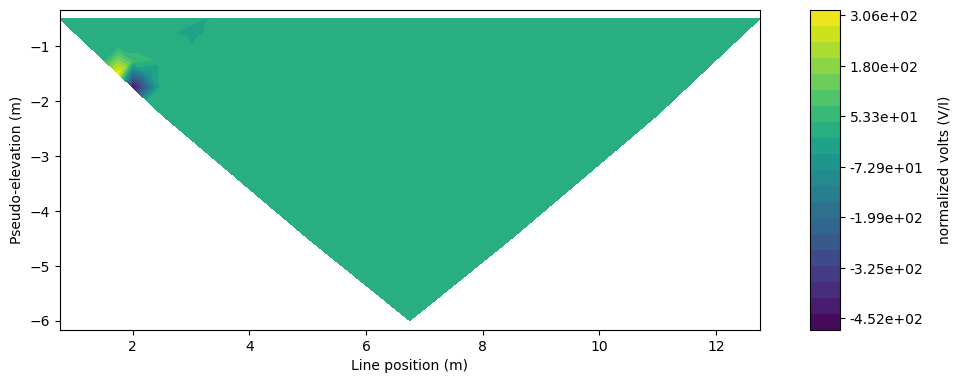

In [16]:
# can plot the normalized voltages
ax, im = static_utils.plot_pseudosection(
    survey, norm_v, cbar_label='normalized volts (V/I)',
    contourf_opts={'levels':20}
)

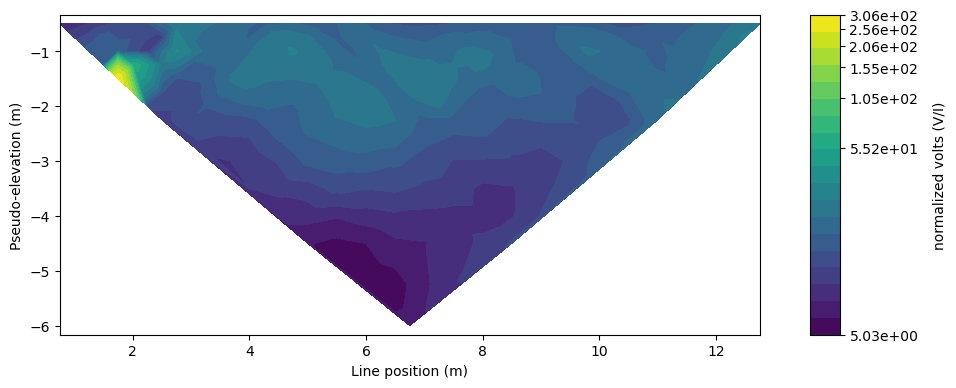

In [32]:
# create a NaN and inf mask
mask_valid = np.isfinite(norm_v) & (norm_v > 0)

if not np.any(mask_valid):
    raise ValueError("No valid finite positive values in norm_v for log scaling.")

# mask the electrode locations
A_valid = A[mask_valid]
B_valid = B[mask_valid]
M_valid = M[mask_valid]
N_valid = N[mask_valid]
norm_v_valid = norm_v[mask_valid]

# filter out the survey itself
survey_valid, sort_index_valid = static_utils.generate_survey_from_abmn_locations(
    locations_a=A_valid,
    locations_b=B_valid,
    locations_m=M_valid,
    locations_n=N_valid,
    data_type='volt',
    output_sorting=True
)

# compute valid log-scale values
vmin = np.min(norm_v_valid)
vmax = np.max(norm_v_valid)
levels = np.logspace(np.log10(vmin), np.log10(vmax), 20)
norm = mpl.colors.LogNorm(vmin=vmin, vmax=vmax)

# plot on the log scale
ax, im = static_utils.plot_pseudosection(
    survey_valid,
    norm_v_valid,
    cbar_label='normalized volts (V/I)',
    contourf_opts={'levels': levels, 'norm': norm}
)

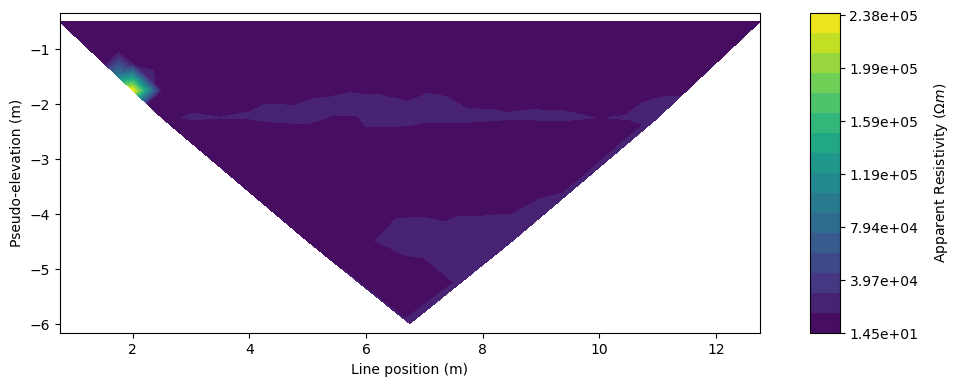

In [33]:
# More relevat though are the apparent resistivities (or conductivities)
rho_app = static_utils.apparent_resistivity_from_voltage(survey, norm_v)

ax, im = static_utils.plot_pseudosection(
    survey, rho_app, cbar_label=r'Apparent Resistivity $(\Omega m)$',
    contourf_opts={'levels':20}
)

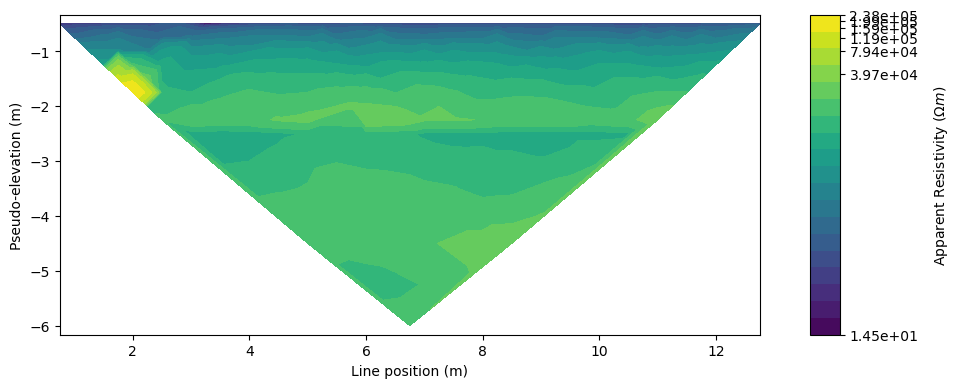

In [34]:
# or even better again, on a log-scale
rho_app = static_utils.apparent_resistivity_from_voltage(survey, norm_v)

levels = np.logspace(
    np.log10(rho_app.min()),
    np.log10(rho_app.max()),
    20
)

norm = mpl.colors.LogNorm()

ax, im = static_utils.plot_pseudosection(
    survey, rho_app, cbar_label=r'Apparent Resistivity $(\Omega m)$',
    contourf_opts={'levels':levels, 'norm':norm}
)

**Wenner Plot:**

### Dipping Slab Plots:

**Dipole-Dipole Plot:**

In [42]:
# load in data using standard STING column headers
slab_dipole_data = pd.read_table('data/10-data/Slab_dpdp_1m.txt', skiprows=98, nrows=224)

A = np.c_[slab_dipole_data['A(x)'],slab_dipole_data['A(z)']]  # Will be an (n_data, 2) array
B = np.c_[slab_dipole_data['B(x)'],slab_dipole_data['B(z)']]
M = np.c_[slab_dipole_data['M(x)'],slab_dipole_data['M(z)']]
N = np.c_[slab_dipole_data['N(x)'],slab_dipole_data['N(z)']]

**Wenner Plot:**